<a href="https://colab.research.google.com/github/WhyJYJ/deeplearning-for-everyone/blob/master/ch19/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19장 세상에 없는 얼굴 GAN, 오토인코더
19-2 오토인코더 실습하기

***오토인코더(Auto-Encoder, AE)***

* 입력 데이터의 특징을 효율적으로 담아낸 이미지를 만들어 냄




In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

#MNIST데이터 셋을 불러옴

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

#생성자 모델을 생성
autoencoder = Sequential()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# 인코딩 - 차원을 줄임
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

MaxPooling 층은 두 번, Upsampling 층은 세 번 why?

=> 크기를 유지시켜 주는 패딩 과정이 없으므로 마스크가 적용되면서 크기가 줄어듬

In [3]:
# 디코딩 - 차원을 점차 늘려 입력 값과 똑같은 크기의 출력 값 내보냄
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) # Padding x
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

Epoch 1/50
469/469 [==============================] - 79s 169ms/step - loss: 0.2177 - val_loss: 0.1413
Epoch 2/50
469/469 [==============================] - 79s 169ms/step - loss: 0.1292 - val_loss: 0.1195
Epoch 3/50
469/469 [==============================] - 79s 168ms/step - loss: 0.1169 - val_loss: 0.1121
Epoch 4/50
469/469 [==============================] - 79s 168ms/step - loss: 0.1115 - val_loss: 0.1079
Epoch 5/50
469/469 [==============================] - 79s 169ms/step - loss: 0.1079 - val_loss: 0.1046
Epoch 6/50
469/469 [==============================] - 79s 169ms/step - loss: 0.1051 - val_loss: 0.1023
Epoch 7/50
469/469 [==============================] - 80s 170ms/step - loss: 0.1029 - val_loss: 0.1004
Epoch 8/50
469/469 [==============================] - 80s 170ms/step - loss: 0.1009 - val_loss: 0.0985
Epoch 9/50
469/469 [==============================] - 80s 170ms/step - loss: 0.0994 - val_loss: 0.0973
Epoch 10/50
469/469 [==============================] - 80s 170ms/step - l

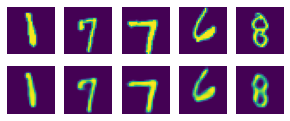

In [4]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

#학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옴
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣음

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정함

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줌
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력
   ax.axis('off')
plt.show()
